## <strong> 0. Abstact </strong>

State-of-the-art object detection network들은 object location들을 추정하기 위해 region proposal algorithm들에 의존한다. <br>
SPPnet과 Fast R-CNN과 같은 발전들은 detection network의 running time을 줄였지만 region proposal 연산이 bottleneck으로 작동한다. <br>
연구진들은 위 문제를 해결하기 위해 detection network와 전체 이미지의 convolutional feature들을 공유하여 region proposal을 거의 시간 소요없이 가능하게 하는 **Region Proposal Network(RPN)**을 소개한다. <br>
하나의 RPN은 각 위치에서 object bounds와 objectness scores를 동시에 예측하는 **하나의 Fully Convolutional Network**이다. <br>
RPN은 detection을 위해 Fast R-CNN에서 사용된 높은 품질의 region proposal을 만들기 위해 **end-to-end 방식으로 학습된다.** <br>
또한 연구진들은 **RPN과 Fast R-CNN을 그들의 convolutional feature들을 공유하여 single network로 합쳤다**고 한다.--최근에 "attention" mechanism이라고 불리는 방식을 사용하는 것으로 RPN component는 unified network에 어디를 봐야하는지 말해준다. <br>
PASCAL VOC 2007m 2012 그리고 MS COCO dataset들에 대해 state-of-the-art object detection accuracy를 기록한 동시에 깊은 VGG-16 model 때문에 detection system은 GPU 상에서 5fps frame rate를 기록했다. <br>
ILSVRC와 COCO 2015 competition에서 Faster R-CNN과 RPN은 몇 가지 track에서 1등 수상작의 토대이다.  


## <strong> 1. Introduction </storng>

object detection의 최근 발전은 region proposal 방식과 region-based convolutional neural networks(R-CNNs)의 성공으로부터 시작되었다. <br>
비록 region-based CNNs는 처음에는 연산적으로 비쌌지만, SPPnet과 Fast R-CNN 덕분에 극적으로 연산량을 줄일 수 있었다. <br>
Fast R-CNN은 region proposal에 소요되는 시간을 무시할 때 거의 실시간으로 작동될 수 있다. <br>
**즉, proposals는 state-of-the-art detection system에서 test-time computational bottleneck이다.**

Region proposal 방식은 전형적으로 저렴한 feature들과 경제적인 추론 이론들에 의존한다. <br>
가장 인기있는 이론 중 하나인 **Selective Search**는 조작된 low-level feature들 기반으로하는 superpixel들을 grid하게 합친다. <br>
그러나 효율적인 detection network와 비교했을때, Selective Search는 CPU에서 계산되기 때문에 각 이미지당 **2초 정도 더 느리다.** <br>
EdgeBox들은 각 이미지당 0.2초로 proposal quality와 speed 사이의 tradeoff를 제공한다. <br>
**그럼에도 불구하고 region proposal step은 detection network로써 너무 많은 running time을 소비한다.**

fast R-CNN은 region proposal 방식이 CPU에서 수행되는 동시에 GPU들의 이점을 사용하여 runtime을 비교할 때 불균형 이룬다. <br>
**proposal 연산을 가속화하는 한 가지 명확한 방법은 GPU에서 재수행(re-implementation)시키는 것이다.** <br>
이것은 효과적인 engineering solution이지만 재수행은 network의 down-stream을 무시하므로 computation을 공유하기 위해 중요한 기회를 잃어버린다.

이 논문에서 연구진들은 **algorithm적 변화**가 주어진 detection network의 연산에서 proposal 연산이 거의 시간을 소비하지 않는 우아하고 효과적인 solution을 이끌어내는 것을 보여준다고 한다. <br>
연구진들은 이를 위해 SPPNet, Fast R-CNN과 함께 Conv layer들을 공유하는 새로운 Region Proposal Networks(RPNs)를 소개한다. <br>
test-time때 convolutions를 공유함으로써 proposal 연산을 위한 비용이 감소한다. (각 image당 10ms 가량 감소한다.)

Fast R-CNN과 같은 region-based detector로부터 사용되는 convolutional feature map은 region proposal을 만드는데 사용될 수 있다. <br>
이 convolutional feature들의 최상단에서 규칙적인 grid의 각 위치에서 region bounds와 objectness score를 동시에 regress하는 몇 개의 추가적인 Conv layer를 사용하여 RPN을 구성했다고 한다. <br>
그러므로 RPN은 하나의 fully convolutoinal network이며 detection proposal을 만드는 과제를 end-to-end 방식으로 학습이 가능하다.

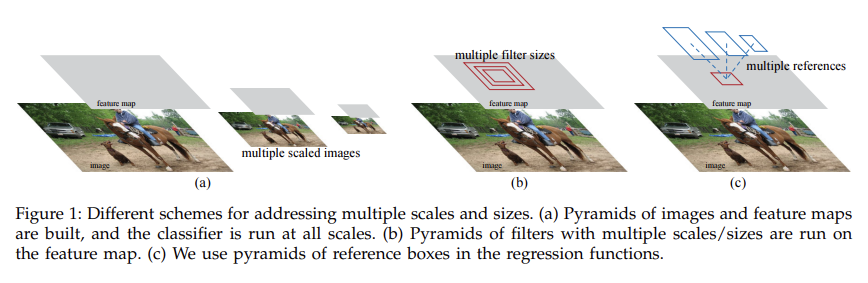 


RPN은 많은 크기와 면 비율을 사용해 region proposal을 효과적으로 예측하도록 디자인된다. <br>
이미지들의 pyramid들을 사용(Figure 1, a)하거나 filter들의 pyramid들을 사용(Figure 1, b)하는 일반적인 방법들과 다르게 논문에서는 다양한 크기와 변 비율의 reference들을 제공하는 **"anchor boxes"**를 소개한다. <br>
이 방식은 다양한 크기와 비율의 image들과 filter들을 열거하는 것을 방지하는 regression reference들의 pyramid(Figure 1, c)로 생각할 수 있다. <br>
이 모델은 single-scale image들을 training하거나 test할 때 잘 작동하므로 speed에서 이점을 가진다.

RPN을 Fast R-CNN과 합치기 위해 연구진들은 region proposal task에 대한 fine-tuning과 object detection에 대한 fine-tuning을 번갈아 수행하는 학습 방식을 제공한다고 한다. <br>
이 이론은 수렴이 더 빠르고 두 task들 사이에 공유되어 지는 convolutional feature들로 합쳐진 network를 제공한다.

연구진들은 위 방식을 Fast R-CNNs와 함께 구성된 RPN이 Fast R-CNNs보다 detection accuracy를 더 정확하게 평가한 PASCAL VOC detection benchmarks를 사용해 평가했다고 한다. <br>
동시에 이 방법은 test-time때 Selective Search의 computational burden을 거의 삭제했다.-proposal을 위한 running time은 10ms로 측정되었다고 한다. <br>
expensive한 깊은 모델을 사용함에도 불구하고, detection method는 GPU상에서 5fps 속도를 기록했다고 한다. <br>
즉, 이 방식은 speed와 accuracy 두 면에서 효과적인 object detection system이라고 볼 수 있다.

## <strong> 2. Faster R-CNN </strong>

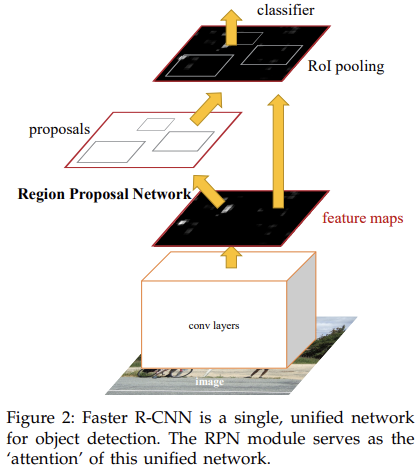

해당 논문의 object detecton system은 두 가지 module로 구성된다. <br>

* Deep fully convolutional network that proposes regions
* Fast R-CNN detector that uses the proposed regions

전체 시스템은 single, unified network이다(Figure 2).
<br>
최근에 인기있는 (neural networks 전문용어로) "attentions" mechanism을 사용하여 RPN module은 Fast R-CNN module에게 어디를 봐야하는지 알려준다. <br>
아래 3.1에서 region proposal을 위한 network의 design과 properties들을 살펴보고 3.2에서는 공유된 feature들을 활요해 두 module을 학습시키기 위한 algorithm을 소개한다고 한다.

<h3> <strong> 2.1 Region Proposal Networks </strong> </h3>

**Region Proposal Network(RPN)은 어떤 크기의 이미지든 입력으로 받고 직사각형의 object proposal들을 objectness score와 함께 반환한다.** <br>
연구진들은 이 처리과정을 이번 section에서 설명할 fully convolutional network로 만들었다고 한다. <br>
우리의 궁극적 목적은 Fast R-CNN object detection network와 computation을 공유하는 것이므로 두 network는 공통된 Conv layer들을 공유한다고 가정한다. <br>
연구진들은 실험에서 5개의 공유 가능한 Conv layer를 가지는 Zeiler and Fergus model(ZF)과 13개의 공유 가능한 Conv layer를 가지는 Simonyan and Zisserman model(VGG-16) 조사했다고 한다.

연구진들은 region proposal을 만들기 위해 공유된 Conv layer중 마지막에서 출력된 **convolutional feature map 위에서 작은 network를 slide했다**고 한다. <br>
이때 작은 network는 입력된 feature map의 **n×n spatial window를 사용한다.** <br>
각 sliding window는 더 작은 차원의 feature로 mapping된다. (256-d for ZF, 512-d for VGG) <br>
이 feature는 **두 개의 sibling fc layer에 입력된다.**-box regression layer & box classification layer <br>
논문에서는 **n=3**을 사용했다고 하며 input image의 실질적 receptive filed는 크다고 한다. (ZF-172, VGG-228) <br>
이 mini-network는 Figure 3에서 묘사된다. <br>
mini-network는 sliding-window 형태안에서 작동되기 때문에 두 fc layer들은 모든 spatial location들을 아울러 공유된다고 한다. <br>
이 architecture는 두 sibling 1×1 Conv layer로 이어지는 n×n Conv layer로 구현된다고 한다.

* sliding window: region proposal을 위해 동일한 간격을 이동하면서 원본 이미지에서 window 크기를 잘라내는(sliding) 방식 <br>
(위 sliding window와 의미는 다르지만 참고용으로 적어놨다.)


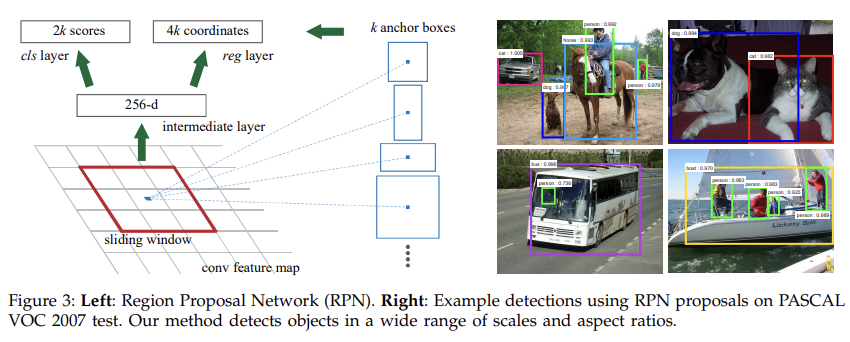

**[참고]**

RPN으로 생성되는 RoI는 original image의 RoI이다. <br>
그래서 anchor box의 scale은 original image 크기에 맞춰서 128, 256, 512와 같이 생성한다. <br>
또한 논문에서는 128, 256, 512 3개 scale과 1:1, 1:2, 2:1 3개 aspect ratio를 사용하여 9개의 anchor box를 사용한다. <br>
아래는 위 RPN 과정을 쉽게 풀어놓은 그림이다.

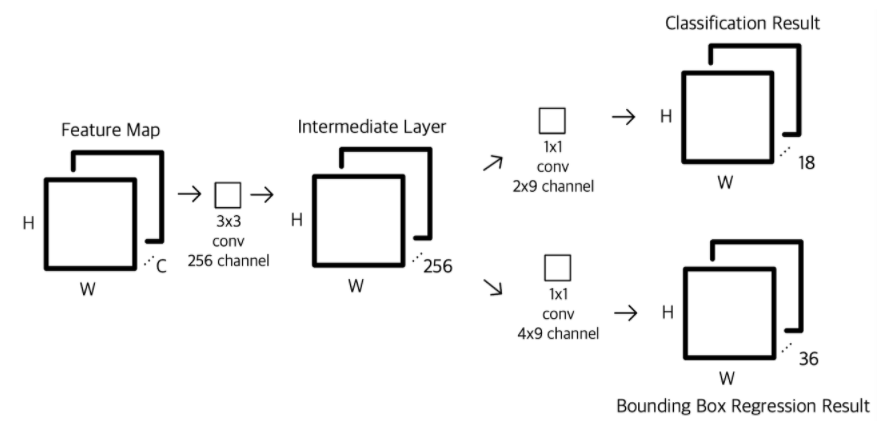

[그림 출처: https://deep-learning-study.tistory.com/464]

1000×600 크기의 image가 입력으로 주어졌다고 가정하자. <br>
그러면 약 20000개(60×40×9)개의 anchor들이 나온다. <br>
즉, 너무 많은 anchor이 나오므로 일부를 제거해야할 필요가 있다. <br> 
이를 위해 먼저 **경계를 넘어가는 anchor들을 제거할 수 있다.** <br>
이 과정을 진행하면 학습을 위해 각 image당 약 6000개의 anchor이 남는다고 한다. <br>
하지만 test-time때 여전히 fully convolutional RPN을 적용해야 한다. <br>
즉, 이는 많은 cross-boundary proposal box들을 생산하고 우리는 이 anchor들을 image 경계에 맞게 잘라야 한다.

이후 겹치는 부분이 많은 proposal을 제거할 수도 있다. <br>
실제로 몇 개의 RPN proposal들은 서로 많이 overlap되어 있을 수도 있다. <br>
이러한 불필요한 중복을 제거하기 위해 cls score를 기반으로하는 proposal region들의 **non-maximum suppression(NMS)**을 사용할 수 있다. <br>
연구진들은 NMS를 위한 IoU 임계값을 0.7로 고정하여 각 image당 2000개의 proposal region을 남기도록 했다. <br>
연구진들은 NMS 이후에 top-N으로 평가된 proposal region들을 detection에 사용했다고 한다. <br>
단, training에서는 2000개의 proposal을 사용했지만 test-time에는 다른 개수를 사용한다고 한다.




<h4> <strong>2.1.1 Anchors</strong> </h4>

각 sliding-window location에서 연구진들은 각 위치에서 가능한 최대 proposal의 개수가 k인 여러 region proposal들을 동시에 예측했다고 한다. <br>
따라서 **reg layer는 k개의 박스의 좌표를 표현하는 4k개의 ouput을 가지고 cls layer는 각 proposal가 object인지 아닌지를 나타내는 확률을 표현하는 2k개의 score를 출력한다.** <br> 
k개의 proposal들은 **anchors**라고 불리는 k개의 reference box들에 관하여 파리미터로 표현된다. <br>
하나의 anchor은 sliding window의 중앙에 위치시키고 Figure 3의 예시와 같이 bounding-box의 크기와 비율에 연관이 있다.
<br>
연구진들은 3개의 scale과 3개의 비율을 사용하여 k=9개의 anchor을 사용했다고 한다. <br>
즉, convolutional feature map의 크기가 W×H라고 하면 WHk개의 anchor이 존재한다.

> <strong> Translation-Invariant Anchors </strong>
>
> 위 접근 방식의 중요한 특징은 anchor들과 anchor들에 관한 proposals를 계산하는 함수에 관해서 **translation invariant**하다. <br>
만약 이미지 안에서 하나의 object를 변형시켰다면, 그 proposal은 뱐형되어야 하며 같은 위치에서 동일한 함수는 그 proposal을 예측할 수 있어야 한다. <br>
이 translation-invariant는 Faster R-CNN 방식에서 보장된다고 한다. <br>
하나의 비교 예시로, MultiBox 방식은 800개의 anchor들을 만들기 위해 translation invariant를 보장하지 않는 k-means를 사용한다. <br>
따라서 MultiBox는 object가 변형되었을 때 동일한 proposal을 보장할 수 없다고 한다.
>
> translation-invariant property는 model-size를 줄일 수 있다. <br>
MultiBox는 (4+1)×800-차원의 fc output layer을 가지지만 Faster R-CNN은 (4+2)×9-차원의 convolutional output layer를 가진다.




> <strong> Multi-Scale Anchors as Regression References </strong>
>
> anchors의 설계는 여러 크기와 비율에 접근하기 위한 새로운 이론을 제공한다. <br>
Figure 1에서 처럼, multi-scale 예측을 위한 두 가지 인기있는 방식이 존재한다. <br>
>* image/feature pyramid들을 기반으로 하는 방법-종종 유용하지만 시간 소비가 크다. <br>
>* feature map에서 여러 크기의 sliding window를 사용하는 방법-일반적으로 첫 번째 방식과 함께 사용된다.
>
> Faster R-CNN의 anchor 기반 방식은 시간상 더 효율적인 anchors pyramid를 사용하여 만들어진다. <br>
이 방식은 다양한 크기와 비율의 anchor box를 참고하여 boudning-box들을 classify하고 regress한다. <br>
이 방식은 단지 image와 feature map의 single scale에 의존하고 single size의 filter(sliding-windows)를 사용한다. <br>
연구진들은 Table 8에 다양한 scale과 size의 효과를 보여줬다고 한다.
>
> 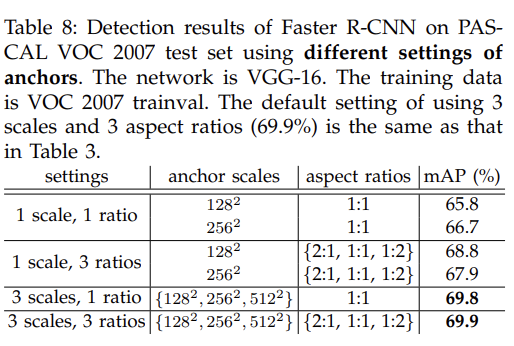
> 
> anchors 기반의 multi-scale design 덕분에 연구진들은 single-scale image에 대해 계산된 convolutional feature들을 간단히 사용할 수 있었다고 한다. <br>
multi-scale anchors의 설계는 여러 scale을 다루기 위해 추가적 소비 없이 feature들을 공유하기 위한 핵심 요소중 하나이다.

<h4> <strong>2.1. Loss Function</strong> </h4>

RPN을 학습시키기 위해 연구진들은 각 anchor에 binary class label을 배정했다. <br>
이때 **두 종류의 anchor에 대해 positive label을 배정했다**고 한다.

* 하나의 ground-truth box와의 **Intersection-over-Union(IoU)가 anchor들 중에 가장 높은 anchor/anchors인 경우**
* 임의의 ground-truth box와의 **Intersection-over-Union(IoU)가 0.7보다 큰 경우**

하나의 single ground-truth box는 여러 anchors들로 positive label들을 배정받을 것이다.<br>
일반적으로 두 번째 상태로 positive sample들을 결정하는데 충분하다고 한다.; 그러나 연구진들은 특별한 경우 두 번째 상태로 positive sample을 못 찾을 수도 있기 때문에 첫 번째 상태도 고려했다고 한다. <br>
negative label은 다음과 같은 경우 배정했다고 한다.

* non-positive인 anchor중 **모든 ground-truth box들과의 IoU가 0.3보다 작은 경우**

이외의 anchor들은 training objective에 기여하지 않는다고 한다.

위 정의와 함께, Faster R-CNN에서는 Fast R-CNN에서 사용한 multi-task loss를 최적화한다고 한다. <br>
loss 함수는 다음과 같다.

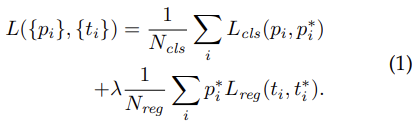

* $i$: index of an anchor in a mini-batch
* $p_i$: predicted probability of anchor i being and object
* $p_i^*$: ground-truth label. (1 if the anchor is positive, 0 if the anchor is negative)
* $t_i$: vector representing the 4 parameterized coordinates of the predicted bounding box
* $t_i^*$: ground-truth box associated with a positive anchor
* $L_{cls}$: log loss over two classes (object vs. not object)
* $L_{reg}$: regression loss, $L_{reg}=R(t_i-t_i^*)\,[R \, is \, robust \, loss(=smooth L_1)]$ <br>
regression loss is activated only for positive anchors
* $N_{cls}$: mini-batch size(i.e. 256)
* $N_{reg}$: the number of anchor locations(i.e. about 2,400)
* $\lambda$: default value is 10

<h4> <strong>2.1.3 Training RPNs</strong> </h4>

RPN은 back-propagation과 SGD를 사용해 end-to-end 학습이 가능하다. <br>
연구진들은 이 network를 학습시키기 위해 Fast R-CNN의 image 중심의 sampling 방식을 사용했다고 한다. <br>
각 mini-batch는 많은 positive와 negative example ancors를 포함하는 하나의 single image로 발생한다. <br>
모든 anchors의 loss function에 대해 optimize하는 것이 가능하지만 negative sample의 양이 많기 때문에 bias가 생길 것이다. <br>
대신에, 연구진들은 mini-batch의 loss function을 계산하기 위해 하나의 이미지에서 positive와 negative가 1:1로 sampling된 256개의 anchor를 무작위로 뽑았다고 한다. <br>
만약 positive sample의 개수가 128개 보다 적다면, negative sample로 mini-batch를 채웠다고 한다.

아래는 실험의 Hyper Parameters, weight 초기화 방식이다.

* all new layers: initialized by drawing weights from zero-mean Gaussian distribution with standard deviation 0.01
* all other layer(i.e. the shared Conv layers): initialized by pretraining a model for ImageNet classification
* learning rate: 0.001 for 60k mini-batches, 0.0001 for 20k mini-batches
* momentum: 0.9 / weight decay: 0.0005

<h3> <strong> 2.2 Sharing Features for RPN and Fast R-CNN </strong> </h3>

지금까지는 만들어지는 proposal을 활용하는 region-based object detection CNN을 고려하지 않고 어떻게 region proposal 제작을 위한 network가 학습되는지 설명했다. <br>
**detection network에는 Fast R-CNN을 사용했다.** <br>
공유되는 Conv layer와 RPN와 Fast R-CNN으로 구성된 unified network를 학습하는 algorithm들은 Figure 2에 설명되어 있다.

RPN과 Fast R-CNN은 독립적으로 학습되며 그들의 Conv layer는 다른 방법으로 수정된다. <br>
그러므로 두 개의 분리된 network를 각각 학습하는 것 보다 두 network들 사이의 Conv layer를 공유하는 것을 허용해주는 기술을 개발할 필요가 있다. <br>
연구진들은 공유된 features와 network를 학습시키는 세가지 방식을 논의했다고 한다.

* **Alternating training.** <br>
먼저 RPN을 학습시키고 해당 proposal들을 Fast R-CNN학습에 사용한다. <br>
이후 Fast R-CNN으로 조정된 network는 RPN를 초기화하는데 사용될 수 있고 이 과정이 반복된다. <br>
이 방법이 이 논문의 모든 실험에서 사용된 방식이다.

* **Approximate joint training** <br>
이 방식은, RPN과 Fast R-CNN network를 Figure 2처럼 training 동안 하나의 network로 합친 것이다. <br>
각 SGD iteration에서 forward pass는 Fast R-CNN detector를 학습시킬 때 고정되고 미리 계산된 proposal로 취급되는 region proposal들을 생산한다. <br>
이때 RPN loss와 Fast R-CNN loss에 대한 backward propagated signal들이 공유되는 layer에서 결합되어 backward propagation이 발생하게 된다. <br>
이 방식은 구현이 간단하다. <br>
하지만 이 방식은 network respose인 proposal box들의 좌표들에 관한 파생물을 무시하므로 근사치가 된다. <br>
실험에서 연구진들은 경험적으로 이 해결책이 정답에 가까운 결과를 제공한다는 사실을 발견했지만 alternating training과 비교했을 때 약 25~50% 정도 감소했다.

* **Non-approximate joint training**<br>
위에서 이야기한 것 처럼 RPN으로 예상된 bounding box들은 또한 input의 함수이다. <br>
Fast R-CNN의 RoI pooling layer는 convolutional feature map과 예측된 bounding box들을 input으로 받아들인다. <br> 그래서 이론적으로 타당한 backpropagation 해결책은 box 좌표들과 관련된 gradient를 포함해야 한다. <br>
이 gradient는 approximate joint training에서 무시된다. <br>
즉, non-approximate joint training solution에서는 box 좌표들에 대해 미분 가능한 RoI pooling layer가 필요하다. <br>
이 중대한 문제와 solution은 RoI warping layer로 해결이 가능한데, 이 layer는 해당 논문의 범위에서 벗어난다고 한다.

> <strong> 4-step Alternating Training </strong>
>
> 연구진들은 alternating optimization을 통해 공유된 feature들을 학습하기 위해 4-step training algorithm을 채택했다고 한다. <br>
첫 번째로 Section 2.1.3에서 설명된 방식으로 RPN을 훈련시킨다. <br>
이 network는 ImageNet-pre-trained model로 초기화되며, region proposal task를 end-to-end 방식으로 fine-tune한다. <br>
두 번째로 첫 번째 단계에서 만든 proposal들을 사용하여 Fast R-CNN으로 분리된 detection network를 학습시킨다. <br>
이 detection network 역시 ImageNet-pre-trained model로 초기화한다. <br>
현 시점에서 두 network는 Conv layer를 공유하지 않았다. <br>
세 번째로 detector network를 RPN training을 초기화(initialize)하는데 사용한다. <br>
단, 공유된 Conv layer들은 고정하고 오직 RPN에 국한된 layer들만 fine-tune한다. <br>
이제 두 network는 Conv layer를 공유한다. <br>
마지막으로, 공유된 Conv layer를 고정시킨 상태를 유지하고, Fast R-CNN에 국한된 층을 fine-tune한다. <br>
>
> **[정리]** <br>
>* ImageNet=pre-trained model을 불러와서 RPN을 학습시킨다.
>* 학습된 RPN에서 생성된 proposal을 사용해 detection network를 학습시킨다.
>* detector network와 RPN을 불러온 다음 CNN을 고정시키고 RPN을 학습시킨다.
>* CNN을 고정시키고 detection network를 학습시킨다.


## <strong> 3. Conclusion </strong>

* RPN을 사용해 region proposal을 생성하는 학습을 GPU상에서 수행할 수 있게 되었다.
* convolutional feature들을 공유하여 RPN과 Fast R-CNN이 합쳐진 unified network를 만들어 end-to-end 학습이 가능하다.
* 위와 같은 이유들로 인해 이전 Object Detection model들에 비해 speed와 accuracy면에서 개선되었다.